
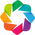

In [1]:
import ccxt
import datetime
import time
import holoviews as hv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output
from holoviews.operation.timeseries import rolling, rolling_outlier_std
from holoviews.streams import Stream
hv.notebook_extension('bokeh')
import matplotlib.pyplot as plt

# Importing data from POLONIEX

In [2]:
# Usamos a CCXT apenas para pegar a lista de moedas negociadas na exchange (POLONIEX)

exchange = ccxt.poloniex() # defino qual a exchange que vai ser analisada (No caso, vamos usar a POLONIEX)
markets = exchange.load_markets() # carrego todos os mercados que existem nessa exchange
mkt_keys = markets.keys() # lista todas as moedas negociadas na POLONIEX
mkt_keys=list(mkt_keys)

print('\033[1m'+'Lista de Moedas: ','\033[0m', mkt_keys, '\n')
print('\033[1m'+'Quantidade de Moedas: ','\033[0m', len(mkt_keys))

Lista de Moedas:   ['BCN/BTC', 'BELA/BTC', 'BLK/BTC', 'BTCD/BTC', 'Bitmark/BTC', 'BTS/BTC', 'BURST/BTC', 'CLAM/BTC', 'DASH/BTC', 'DGB/BTC', 'DOGE/BTC', 'EMC2/BTC', 'FLDC/BTC', 'FLO/BTC', 'GAME/BTC', 'GRC/BTC', 'HUC/BTC', 'LTC/BTC', 'MAID/BTC', 'OMNI/BTC', 'NAV/BTC', 'NEOS/BTC', 'NMC/BTC', 'NXT/BTC', 'PINK/BTC', 'POT/BTC', 'PPC/BTC', 'RIC/BTC', 'XLM/BTC', 'SYS/BTC', 'VIA/BTC', 'XVC/BTC', 'VRC/BTC', 'VTC/BTC', 'XBC/BTC', 'XCP/BTC', 'XEM/BTC', 'XMR/BTC', 'XPM/BTC', 'XRP/BTC', 'BTC/USDT', 'DASH/USDT', 'LTC/USDT', 'NXT/USDT', 'XLM/USDT', 'XMR/USDT', 'XRP/USDT', 'BCN/XMR', 'BLK/XMR', 'BTCD/XMR', 'DASH/XMR', 'LTC/XMR', 'MAID/XMR', 'NXT/XMR', 'ETH/BTC', 'ETH/USDT', 'SC/BTC', 'BCY/BTC', 'EXP/BTC', 'FCT/BTC', 'RADS/BTC', 'AMP/BTC', 'DCR/BTC', 'LSK/BTC', 'LSK/ETH', 'LBC/BTC', 'STEEM/BTC', 'STEEM/ETH', 'SBD/BTC', 'ETC/BTC', 'ETC/ETH', 'ETC/USDT', 'REP/BTC', 'REP/USDT', 'REP/ETH', 'ARDR/BTC', 'ZEC/BTC', 'ZEC/ETH', 'ZEC/USDT', 'ZEC/XMR', 'STRAT/BTC', 'NXC/BTC', 'PASC/BTC', 'GNT/BTC', 'GNT/ETH', 'GNO

In [3]:
curr_1 = input('Please, type the name of one currency from the list above:')

while curr_1 not in mkt_keys:
    #clear_output(True)
    curr_1 = input('Please, type the name of the currency \033[1mexactly\033[0m as it appears on the list above.')
    
curr_2 = input('Please, choose one more currency:')

while curr_2 == curr_1:
    curr_2 = input('Please, choose a different currency.')

while curr_2 not in mkt_keys:
    #clear_output(True)
    #print(curr_1, '\n')
    curr_2 = input('Please, type the name of one currency \033[1mexactly\033[0m as it appears on the list above.')
    
curr_3 = input('Choose one last currency.')

while curr_3 == curr_1 or curr_3 == curr_2:
    curr_3 = input('Please, choose a different currency.')
    
while curr_3 not in mkt_keys:
    #print(curr1, curr2, '\n')
    #clear_output(True)
    curr_3 = input('Please, type the name of one currency \033[1mexactly\033[0m as it appears on the list above.')

print('\nYou choose these currencies: \033[1m', curr_1, ', ', curr_2, ', ', curr_3, '.')

Please, type the name of one currency from the list above:ZRX/BTC
Please, choose one more currency:GNO/BTC
Choose one last currency.BCY/BTC

You choose these currencies:  ZRX/BTC ,  GNO/BTC ,  BCY/BTC .


In [4]:
list_of_curr = [curr_1, curr_2, curr_3]
list_of_curr

['ZRX/BTC', 'GNO/BTC', 'BCY/BTC']

In [5]:
import Poloniex_franklin # imports a list of functions that will be used forward in the analysis.

In [6]:
Poloniex_franklin.get_data(list_of_curr, '2014-01-01', '2018-01-29', 86400)

 Download complete. Check your work directory. 


# Saving data downloaded into a SQL database

In [7]:
# Importing packages needed to work with SQL databases

import sqlite3
import pymysql as psql
import pandas.io.sql as psql
from sqlite3 import Error
import pymysql

In [8]:
data = Poloniex_franklin.call_data(list_of_curr)

In [9]:
data.head()

,close,high,low,open,quoteVolume,volume,weightedAverage,currency
date,,,,,,,,
2017-08-19,0.000113,1000.000000,0.000089,1000.000000,5.398677e+07,6736.388109,0.000125,BTC_ZRX
2017-08-20,0.000103,0.000116,0.000095,0.000113,1.921579e+07,2028.504621,0.000106,BTC_ZRX
2017-08-21,0.000087,0.000110,0.000078,0.000103,1.993366e+07,1863.972997,0.000093,BTC_ZRX
2017-08-22,0.000090,0.000098,0.000081,0.000087,1.038836e+07,931.364158,0.000090,BTC_ZRX
2017-08-23,0.000093,0.000105,0.000090,0.000090,1.089858e+07,1043.342466,0.000096,BTC_ZRX


In [10]:
data.tail()

,close,high,low,open,quoteVolume,volume,weightedAverage,currency
date,,,,,,,,
2018-01-25,0.000077,0.000083,0.000076,0.000083,76771.565307,6.061443,0.000079,BTC_BCY
2018-01-26,0.000081,0.000085,0.000069,0.000078,240680.343333,18.231307,0.000076,BTC_BCY
2018-01-27,0.000077,0.000089,0.000076,0.000081,132663.101764,10.819814,0.000082,BTC_BCY
2018-01-28,0.000073,0.000080,0.000073,0.000077,118508.234066,8.906619,0.000075,BTC_BCY
2018-01-29,0.000072,0.000076,0.000071,0.000073,79464.558937,5.827289,0.000073,BTC_BCY


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312 entries, 2017-08-19 to 2018-01-29
Data columns (total 8 columns):
close              1312 non-null float64
high               1312 non-null float64
low                1312 non-null float64
open               1312 non-null float64
quoteVolume        1312 non-null float64
volume             1312 non-null float64
weightedAverage    1312 non-null float64
currency           1312 non-null object
dtypes: float64(7), object(1)
memory usage: 92.2+ KB


In [12]:
Poloniex_franklin.data_to_sql(data, 'Base')

In [13]:
connection = sqlite3.connect('Base.db') # creates a connection with the database
cur = connection.cursor() # starts a cursor

# Visualizations

### 1st Graph: Series in level.

In [14]:
# Prepare the label to each series

moeda = curr_1.split('/')
moeda.reverse()
moeda1 = str(moeda[0]+'_'+moeda[1])

moeda = curr_2.split('/')
moeda.reverse()
moeda2 = str(moeda[0]+'_'+moeda[1])

moeda = curr_3.split('/')
moeda.reverse()
moeda3 = str(moeda[0]+'_'+moeda[1])

print(moeda1,moeda2,moeda3)

BTC_ZRX BTC_GNO BTC_BCY


In [15]:
# preloads the database to feed the graphs.

dados_moeda1 = pd.read_sql_query('select date,close from Base WHERE currency like "{}"'.format(moeda1), connection)
dados_moeda1['date']=pd.to_datetime(dados_moeda1['date'], format='%Y-%m-%d')
dados_moeda1.set_index('date', inplace=True)
dados_moeda1['{}'.format(moeda1)]=dados_moeda1['close']


dados_moeda2 = pd.read_sql_query('select date,close from Base WHERE currency like "{}"'.format(moeda2), connection)
dados_moeda2['date']=pd.to_datetime(dados_moeda2['date'], format='%Y-%m-%d')
dados_moeda2['{}'.format(moeda2)]=dados_moeda2['close']
dados_moeda2.set_index('date', inplace=True)

dados_moeda3 = pd.read_sql_query('select date,close from Base WHERE currency like "{}"'.format(moeda3), connection)
dados_moeda3['date']=pd.to_datetime(dados_moeda3['date'], format='%Y-%m-%d')
dados_moeda3['{}'.format(moeda3)]=dados_moeda3['close']
dados_moeda3.set_index('date', inplace=True)

lista = [dados_moeda1, dados_moeda2, dados_moeda3]
dados_graf = pd.concat(lista, axis=1)


In [16]:
dados_graf.head()

,close,BTC_ZRX,close,BTC_GNO,close,BTC_BCY
date,,,,,,
2015-09-09,NaN,NaN,NaN,NaN,0.000219,0.000219
2015-09-10,NaN,NaN,NaN,NaN,0.000280,0.000280
2015-09-11,NaN,NaN,NaN,NaN,0.000174,0.000174
2015-09-12,NaN,NaN,NaN,NaN,0.000102,0.000102
2015-09-13,NaN,NaN,NaN,NaN,0.000084,0.000084


In [17]:
def load_symbol(symbol, **kwargs):
   
    df=data[symbol]
    df['date'] = df.index
     
    return hv.Curve(df, ('date', 'Date'), ('close', 'Close price'))


stock_symbols = ['{}'.format(moeda1),'{}'.format(moeda2) ,'{}'.format(moeda3)]
data = {'{}'.format(moeda1):dados_moeda1.iloc[-100:],'{}'.format(moeda2):dados_moeda2.iloc[-100:],'{}'.format(moeda3):dados_moeda3[-100:]}
dmap = hv.DynamicMap(load_symbol, kdims='Symbol').redim.values(Symbol=stock_symbols)

In [18]:
%%opts Curve [width=700 tools=['hover']] {+framewise} 
dmap

:DynamicMap   [Symbol]

### 2nd  Graph:  Volatility

In [19]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
def rolling_vol(w, symbol):
    dt = dados_graf
    S = dados_graf['{}'.format(symbol)].rolling(w).std()
    dt['Volatility'] = S
    dt['date'] = dados_graf.index

    return hv.Curve(dt.iloc[-2000:], ('date', 'Date'), ('Volatility','Rolling volatility'))

stock_symbols = ['{}'.format(moeda1), '{}'.format(moeda2),'{}'.format(moeda3)]
data = {"{}".format(moeda1): dados_moeda1, '{}'.format(moeda2):dados_moeda2}    
winsize = range(10,60,2)
rvol = hv.DynamicMap(rolling_vol, kdims=['Wsize', 'Symbol']).redim.values(Symbol=stock_symbols).redim.range(Wsize=(10,60))
rvol

:DynamicMap   [Wsize,Symbol]

### 3rd Graph: Daily Returns

In [20]:
dados_moeda = [dados_moeda1, dados_moeda2, dados_moeda3]
dados_moeda = pd.concat(dados_moeda, axis=1, join='outer')
del dados_moeda['close']
dados_moeda.tail()

,BTC_ZRX,BTC_GNO,BTC_BCY
date,,,
2018-01-25,0.000146,0.020221,0.000077
2018-01-26,0.000181,0.019636,0.000081
2018-01-27,0.000184,0.020236,0.000077
2018-01-28,0.000170,0.020520,0.000073
2018-01-29,0.000166,0.020499,0.000072


In [21]:
returns_crypto = dados_moeda.pct_change()

In [22]:
returns_crypto.tail()

,BTC_ZRX,BTC_GNO,BTC_BCY
date,,,
2018-01-25,-0.011486,-0.049056,-0.066206
2018-01-26,0.237236,-0.028909,0.055058
2018-01-27,0.014750,0.030564,-0.048000
2018-01-28,-0.076596,0.014031,-0.057531
2018-01-29,-0.021990,-0.001014,-0.012483


In [23]:
returns_graph = returns_crypto
returns_graph['date'] = returns_crypto.index
returns_graph['date'] = pd.to_datetime(returns_graph['date'], format = '%Y-%m-%d')

In [24]:
returns_graph.tail()

,BTC_ZRX,BTC_GNO,BTC_BCY,date
date,,,,
2018-01-25,-0.011486,-0.049056,-0.066206,2018-01-25
2018-01-26,0.237236,-0.028909,0.055058,2018-01-26
2018-01-27,0.014750,0.030564,-0.048000,2018-01-27
2018-01-28,-0.076596,0.014031,-0.057531,2018-01-28
2018-01-29,-0.021990,-0.001014,-0.012483,2018-01-29


In [25]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
p = hv.Curve(returns_graph[-10000:], ('date', 'Date'),('{}'.format(moeda1), 'daily Return rate'), label='{} returns'.format(moeda1)).hist(num_bins=150)
p 


:AdjointLayout
   :Curve   [date]   (BTC_ZRX)
   :Histogram   [BTC_ZRX]   (BTC_ZRX_frequency)

In [26]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
p = hv.Curve(returns_graph[-10000:], ('date', 'Date'),('{}'.format(moeda2), 'daily Return rate'), label='{} returns'.format(moeda2)).hist(num_bins=150)
p 

:AdjointLayout
   :Curve   [date]   (BTC_GNO)
   :Histogram   [BTC_GNO]   (BTC_GNO_frequency)

In [27]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
p = hv.Curve(returns_graph[-10000:], ('date', 'Date'),('{}'.format(moeda3), 'daily Return rate'), label='{} returns'.format(moeda3)).hist(num_bins=150)
p 

:AdjointLayout
   :Curve   [date]   (BTC_BCY)
   :Histogram   [BTC_BCY]   (BTC_BCY_frequency)

### 4th Graph: Scatter Plot

Choose 2 currencies.


In [28]:
list_of_curr

['ZRX/BTC', 'GNO/BTC', 'BCY/BTC']

In [29]:
x = input('Please choose one currency for scatter plotting.')

while x not in list_of_curr:
    x = input('Please, choose one from the list above and make sure you write its name correctly.')

y = input('Please, choose one more currency for scatter plotting.')

while y not in list_of_curr:
    y = input('Please, choose one from the list above and make sure you write its name correctly.')
              
x1=x.split('/')
x1.reverse()
x=str(x1[0]+'_'+x1[1])
              
y1=y.split('/')
y1.reverse()
y=str(y1[0]+'_'+y1[1])

Please choose one currency for scatter plotting.ZRX/BTC
Please, choose one more currency for scatter plotting.GNO/BTC


In [30]:
%%opts Scatter [width=700, height=500, show_grid=True] {+framewise}
%%opts Curve (color='red' line_width=1.5)
c = hv.Curve((np.arange(-.1,.1,.01),np.arange(-.1,.1,.01)),str(x), str(y))
s = hv.Scatter((returns_graph['{}'.format(x)][-1300:],returns_graph['{}'.format(y)][-1300:]),kdims=[x], vdims=[y]).redim.range(ETH=(-.1,.1),BTC=(-.1,.1)).hist(num_bins=150, dimension=[str(x),str(y)])
c*s

:AdjointLayout
   :Overlay
      .Curve.I   :Curve   [BTC_ZRX]   (BTC_GNO)
      .Scatter.I :Scatter   [BTC_ZRX]   (BTC_GNO)
   :Histogram   [BTC_GNO]   (BTC_GNO_frequency)
   :Histogram   [BTC_ZRX]   (BTC_ZRX_frequency)

# Portfolio Analysis

In [31]:
returns_crypto.tail() # shows again the daily returns of the three crypto currencies selected.

,BTC_ZRX,BTC_GNO,BTC_BCY,date
date,,,,
2018-01-25,-0.011486,-0.049056,-0.066206,2018-01-25
2018-01-26,0.237236,-0.028909,0.055058,2018-01-26
2018-01-27,0.014750,0.030564,-0.048000,2018-01-27
2018-01-28,-0.076596,0.014031,-0.057531,2018-01-28
2018-01-29,-0.021990,-0.001014,-0.012483,2018-01-29


In [32]:
# import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# makes a list with the three selected cryptocurrencies 

selected = ['{}'.format(moeda1), '{}'.format(moeda2), '{}'.format(moeda3)]

# calculate daily and annual returns of the cryptocurrencies

returns_daily = returns_crypto
returns_annual = returns_daily.mean() * 365

# get daily and covariance of returns of the cryptocurrencies
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 365

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]



In [34]:
df.head() # Portfolios dataframe

,Returns,Volatility,BTC_ZRX Weight,BTC_GNO Weight,BTC_BCY Weight
0,0.940819,1.355800,0.193048,0.483128,0.323824
1,1.519115,1.343702,0.476122,0.201434,0.322444
2,1.143804,1.351866,0.323151,0.442086,0.234763
3,1.410278,1.392563,0.485704,0.372699,0.141597
4,1.204327,1.327631,0.334405,0.378043,0.287551


### 5th Graph: Eficcient Frontier

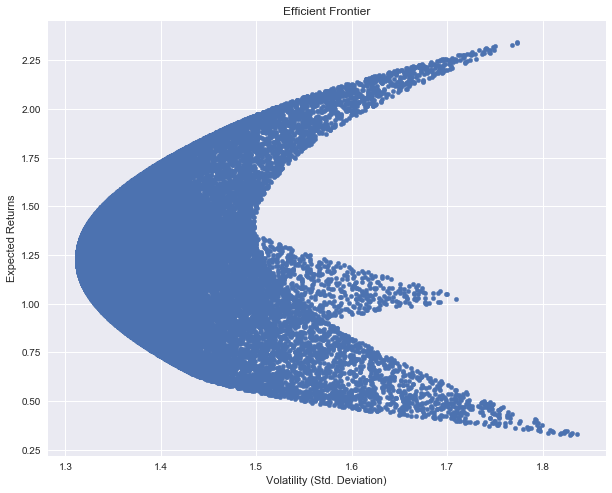

In [35]:
# plot the efficient frontier with a scatter plot

plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [36]:
# calculate daily and annual returns of the stocks
returns_daily = returns_crypto
returns_annual = returns_daily.mean() * 365

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 365

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

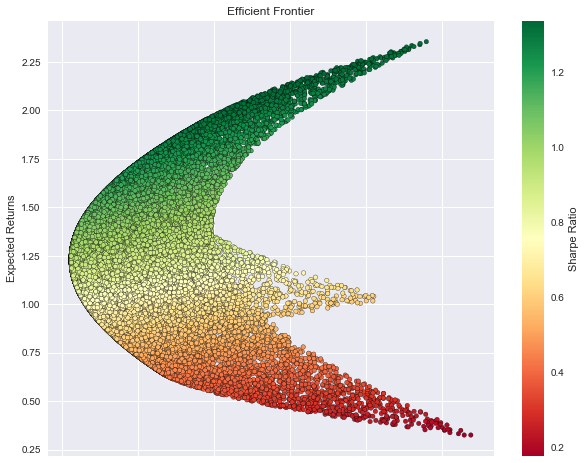

In [37]:
# plot frontier, max sharpe & min Volatility values with a scatterplot

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()


Calculating minimum volatility and maximum Sharpe ratio portfolios...

In [38]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

#### Efficient frontier with minimum variance and maximum Sharpe ratio portfolios

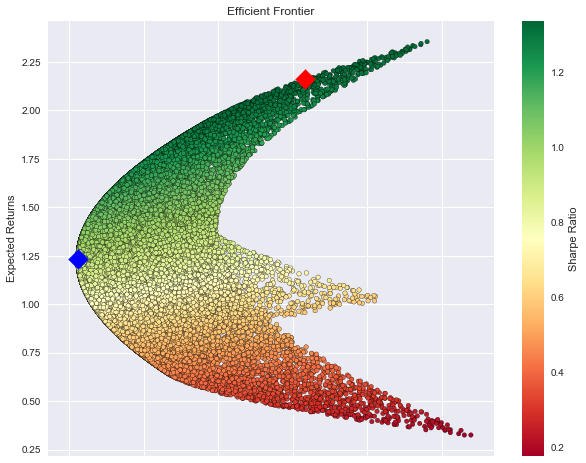

In [39]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

#### Bonus: Plotting portfolio weights

In [40]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                   32017
Returns         1.230643
Volatility      1.312072
Sharpe Ratio    0.937939
BTC_ZRX Weight  0.311457
BTC_GNO Weight  0.297822
BTC_BCY Weight  0.390721
                   38774
Returns         2.160765
Volatility      1.616388
Sharpe Ratio    1.336786
BTC_ZRX Weight  0.849305
BTC_GNO Weight  0.000055
BTC_BCY Weight  0.150641


Weights of the minimum variance portfolio:

In [41]:
min_var = pd.DataFrame(min_variance_port,dtype='float')
weights_min_var = min_var.iloc[0][['{} Weight'.format(moeda1), '{} Weight'.format(moeda2), '{} Weight'.format(moeda3)]]

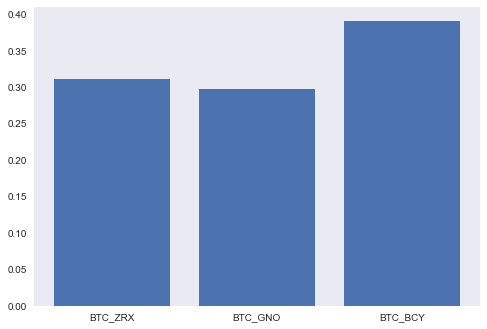

In [42]:
x = np.arange(3)
weights = weights_min_var[0:3]

fig, ax = plt.subplots()
plt.bar(x, weights)
plt.xticks(x, ('{}'.format(moeda1), '{}'.format(moeda2), '{}'.format(moeda3)))
plt.show()

Weights of the Sharpe Portfolio:

p.s.: Risk-free rate is considered to be zero.

In [43]:
sharpe = pd.DataFrame(sharpe_portfolio,dtype='float')
weights_sharpe = sharpe.iloc[0][['{} Weight'.format(moeda1), '{} Weight'.format(moeda2), '{} Weight'.format(moeda3)]]

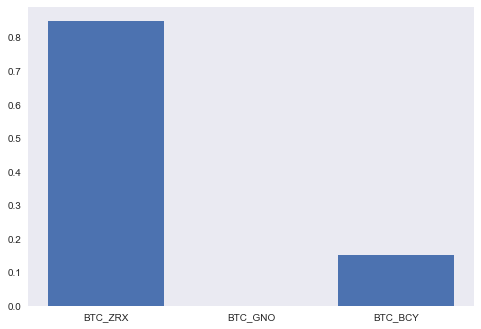

In [44]:
x = np.arange(3)
weights = weights_sharpe[0:3]

fig, ax = plt.subplots()
plt.bar(x, weights)
plt.xticks(x, ('{}'.format(moeda1), '{}'.format(moeda2), '{}'.format(moeda3)))
plt.show()